<a href="https://colab.research.google.com/github/ROHITKUMARECEB/sorting_algorithm/blob/main/genremodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading the data
#split the data into train and test sets
#build the network architecture so need tensor flow

#train network

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/content/json_file"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "namerohitdu/musicgenrejsonfile",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-1-008945cbbae4>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

In [2]:
import os


## east west API is the best ## json-> give permission ->direct access -> and delete after session


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namerohitdu","key":"e4e6877a2a22529ab778a006500ff239"}'}

In [5]:
import os

#create the .kaggel directory
!mkdir -p ~/.kaggle

#moving kaggel.json to the .kaggel directory shayad tbhi use kr payenge is json file ko

!mv kaggle.json ~/.kaggle/

#set file permission nahi to permission error
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
def download_kaggle_dataset(dataset_link, save_path="kaggle_data"):
    """Download and unzip a Kaggle dataset using its link."""
    dataset_name = dataset_link.split("datasets/")[-1]  # Extract dataset name
    os.makedirs(save_path, exist_ok=True)
    !kaggle datasets download -d {dataset_name} --unzip -p {save_path}
    print(f"Dataset downloaded to {save_path}")



download_kaggle_dataset("https://www.kaggle.com/datasets/namerohitdu/musicgenrejsonfile")


Dataset URL: https://www.kaggle.com/datasets/namerohitdu/musicgenrejsonfile
License(s): unknown
 94% 226M/239M [00:02<00:00, 140MB/s]
100% 239M/239M [00:02<00:00, 111MB/s]
Dataset downloaded to kaggle_data


# New section

In [7]:
import json
import numpy as np
from sklearn.model_selection import train_test_split



In [8]:
from tensorflow import keras

import tensorflow.keras as keras

In [22]:

#import plotly.graph_objects as go
import numpy as np

def plot_history(history):
  fig = go.Figure()

  #Accuraacy subplot
  fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history["accuracy"]) + 1)),  # Epochs on x-axis
        y=history.history["accuracy"],
        mode='lines+markers',
        name="Train Accuracy"
    ))
  fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history["val_accuracy"]) + 1)),
        y=history.history["val_accuracy"],
        mode='lines+markers',
        name="Test Accuracy"
    ))

    # Error subplot
  fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history["loss"]) + 1)),
        y=history.history["loss"],
        mode='lines+markers',
        name="Train Loss",
        yaxis="y2"  # Assign to secondary y-axis
    ))
  fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history["val_loss"]) + 1)),
        y=history.history["val_loss"],
        mode='lines+markers',
        name="Test Loss",
        yaxis="y2"
    ))

    # Update layout for interactivity and customization
  fig.update_layout(
        title="Training History",
        xaxis_title="Epoch",
        yaxis_title="Accuracy",
        yaxis2=dict(title="Loss", overlaying="y", side="right"),
        hovermode='closest',
        xaxis=dict(rangeslider=dict(visible=True)),
        dragmode='pan',
        autosize=False,
        width=800,
        height=600,
        margin=dict(l=50, r=50, b=100, t=100, pad=4)
    )

  fig.show()



In [24]:
import matplotlib.pyplot as plt
def plot_history(history):

  fig, axs = plt.subplots(2)
  #create accuracy subplot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")

  #create error subplot

  axs[1].plot(history.history["loss"], label="train accuracy")
  axs[1].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_ylabel("error")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")

  plt.show()

In [9]:

DATASET_PATH = "/content/kaggle_data/data.json"
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)


    #print the keys to their actual names
    print("Keys in the data :", data.keys())

    #converting list into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

if __name__ == "__main__":

  #load data
  inputs, targets = load_data(DATASET_PATH)

  #split the data into train and the test_sets
  inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)


  # build the network architecture
  #jo model apan baneyge -----> that is sequential

  model = keras.Sequential([
      # input layers -> called flatten -> takes multidimension array and flatten it out

      keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),  # input shape ke andar two dimesional array put kiya  -> 1st dimension -> wo jo interval liya tha humne  --> 2nd is representing it's corresponding mfccs

      # inputs.shape[1] ->index 1 isleye kyonki because load data mai jo apan ne inputs variable banaya hai wo 3D hai , and index 0 represent different segment

      #1st hidden layer
      keras.layers.Dense(512, activation="relu"),

      #2ndd layer

      keras.layers.Dense(512, activation="relu"),

      #3rd layers
      keras.layers.Dense(512, activation="relu"),


      #output layer -> we will use 10 neurons  because apan ke pass 10 genres hai.

      keras.layers.Dense(10, activation="softmax"),


  ])


  #compliler network

  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer , loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  model.summary()


  #trian network

MODEL = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)
plot_history(MODEL)




Keys in the data : dict_keys(['mapping', 'mfcc', 'labels'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,331,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,862,154 (7.10 MB)

 Trainable params: 1,862,154 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3186 - loss: 9.9819 - val_accuracy: 0.4089 - val_loss: 3.7485
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5295 - loss: 2.4979 - val_accuracy: 0.4536 - val_loss: 3.1504
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6101 - loss: 1.6516 - val_accuracy: 0.4967 - val_loss: 2.4805
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7028 - loss: 1.0445 - val_accuracy: 0.5160 - val_loss: 2.1973
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7707 - loss: 0.7297 - val_accuracy: 0.5250 - val_loss: 2.2584
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8211 - loss: 0.5523 - val_accuracy: 0.5551 - val_loss: 2.1473
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8573 - loss: 0.4145 - val_accuracy: 0.5471 - val_loss: 2.2404
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9054 - loss: 0.3129 - val_accuracy: 0

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9735 - loss: 0.1074 - val_accuracy: 0.6699 - val_loss: 3.9627
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.6802 - val_loss: 3.6825
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.6792 - val_loss: 3.8148
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9966 - loss: 0.0084 - val_accuracy: 0.6646 - val_loss: 3.8195
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0097 - val_accuracy: 0.6869 - val_loss: 3.7093
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0084 - val_accuracy: 0.6926 - val_loss: 3.6603
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0020 - val_accuracy: 0.6953 - val_loss: 3.5707
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.

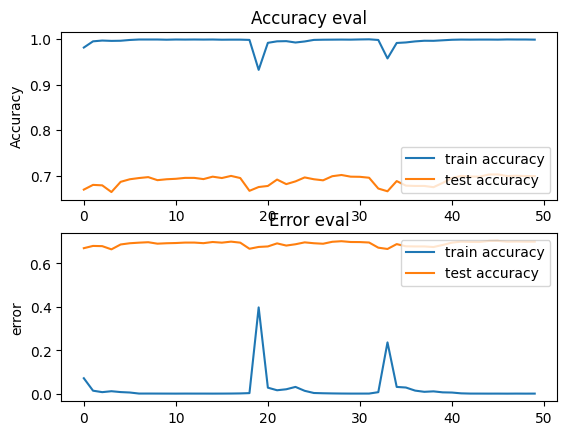

In [17]:
MODEL = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)
plot_history(MODEL)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9913 - loss: 0.0388 - val_accuracy: 0.6499 - val_loss: 4.1423
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9811 - loss: 0.0638 - val_accuracy: 0.6676 - val_loss: 3.6650
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9871 - loss: 0.0535 - val_accuracy: 0.6569 - val_loss: 3.7624
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0341 - val_accuracy: 0.6812 - val_loss: 3.5367
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9976 - loss: 0.0089 - val_accuracy: 0.6752 - val_loss: 3.8174
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9907 - loss: 0.0256 - val_accuracy: 0.6666 - val_loss: 3.8585
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9932 - loss: 0.0237 - val_accuracy: 0.6636 - val_loss: 4.1696
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0415 - val_accu

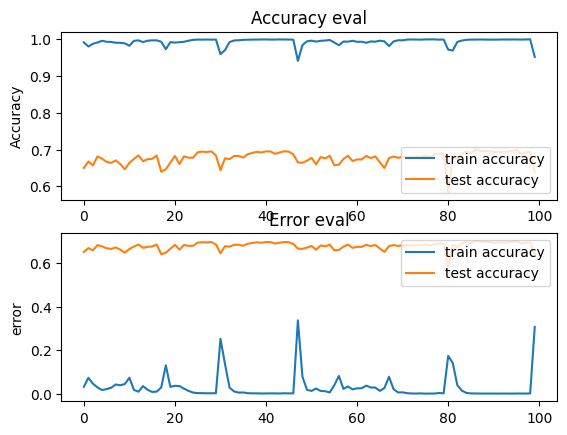

In [16]:
history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=100, batch_size=32)

plot_history(history)
#plotting the  accuracy and error over the epoch



dropout probality : 0.1 - 0.5  which is a hyper parameter


Keys in the data : dict_keys(['mapping', 'mfcc', 'labels'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 2600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,331,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,862,154 (7.10 MB)

 Trainable params: 1,862,154 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1538 - loss: 38.8407 - val_accuracy: 0.3468 - val_loss: 4.2663
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2222 - loss: 5.7148 - val_accuracy: 0.3064 - val_loss: 3.9577
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2278 - loss: 4.5858 - val_accuracy: 0.3244 - val_loss: 3.8342
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2466 - loss: 4.2139 - val_accuracy: 0.3431 - val_loss: 3.7847
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2776 - loss: 4.0289 - val_accuracy: 0.3515 - val_loss: 3.7408
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2849 - loss: 3.9322 - val_accuracy: 0.3568 - val_loss: 3.6968
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3073 - loss: 3.8347 - val_accuracy: 0.3775 - val_loss: 3.6510
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3155 - loss: 3.8018 - val_ac

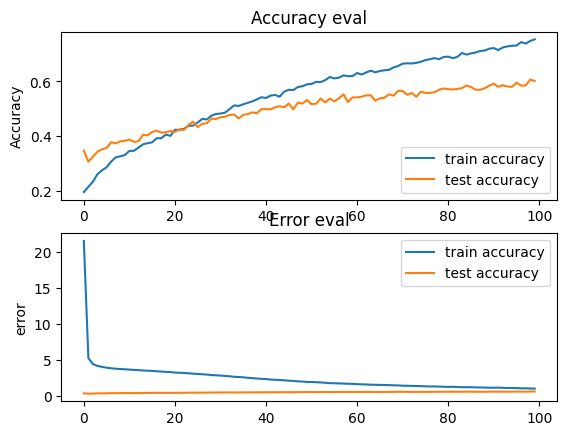

In [26]:
#now regularisation and droup out use kr ke dekhtai hai
if __name__ == "__main__":

  #load data
  inputs, targets = load_data(DATASET_PATH)

  #split the data into train and the test_sets
  inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)


  # build the network architecture
  #jo model apan baneyge -----> that is sequential

  model = keras.Sequential([
      # input layers -> called flatten -> takes multidimension array and flatten it out

      keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),  # input shape ke andar two dimesional array put kiya  -> 1st dimension -> wo jo interval liya tha humne  --> 2nd is representing it's corresponding mfccs

      # inputs.shape[1] ->index 1 isleye kyonki because load data mai jo apan ne inputs variable banaya hai wo 3D hai , and index 0 represent different segment

      #1st hidden layer
      keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.4),

      #2ndd layer

      keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.4),

      #3rd layers
      keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),


      #output layer -> we will use 10 neurons  because apan ke pass 10 genres hai.

      keras.layers.Dense(10, activation="softmax"),


  ])


  #compliler network

  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer , loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  model.summary()

overfitting = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=100, batch_size=32)

plot_history(overfitting)


In [23]:
overfitting = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=40, batch_size=32)

plot_history(overfitting)


Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8383 - loss: 0.8122 - val_accuracy: 0.5978 - val_loss: 1.8766
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.7971 - val_accuracy: 0.5861 - val_loss: 1.8852
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8363 - loss: 0.8140 - val_accuracy: 0.5898 - val_loss: 1.9568
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8449 - loss: 0.7945 - val_accuracy: 0.5971 - val_loss: 1.9168
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8517 - loss: 0.7623 - val_accuracy: 0.5991 - val_loss: 1.9147
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8520 - loss: 0.7423 - val_accuracy: 0.5834 - val_loss: 2.1082
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.7706 - val_accuracy: 0.5978 - val_loss: 1.8830
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.7321 - val_accuracy: 0.

Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9094 - loss: 0.5434 - val_accuracy: 0.6332 - val_loss: 1.8191
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9008 - loss: 0.5546 - val_accuracy: 0.6185 - val_loss: 1.8618
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.5285 - val_accuracy: 0.6265 - val_loss: 1.8192
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9160 - loss: 0.5055 - val_accuracy: 0.6088 - val_loss: 1.9880
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9013 - loss: 0.5642 - val_accuracy: 0.6182 - val_loss: 1.9342
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9157 - loss: 0.5105 - val_accuracy: 0.6228 - val_loss: 1.8783
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9061 - loss: 0.5424 - val_accuracy: 0.6202 - val_loss: 1.8009
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9144 - loss: 0.5211 - val_accuracy: 0.

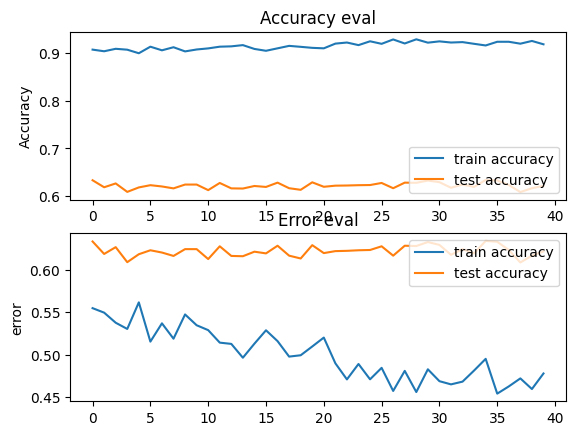

In [25]:
overfitting = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=40, batch_size=32)

plot_history(overfitting)

